In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
numeric_data = data.select_dtypes(include=['number'])
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
numeric_data = numeric_data.dropna()
corr = numeric_data.corr()
print(corr)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


# Heatmap & Exploratory Data Analysis

<Axes: >

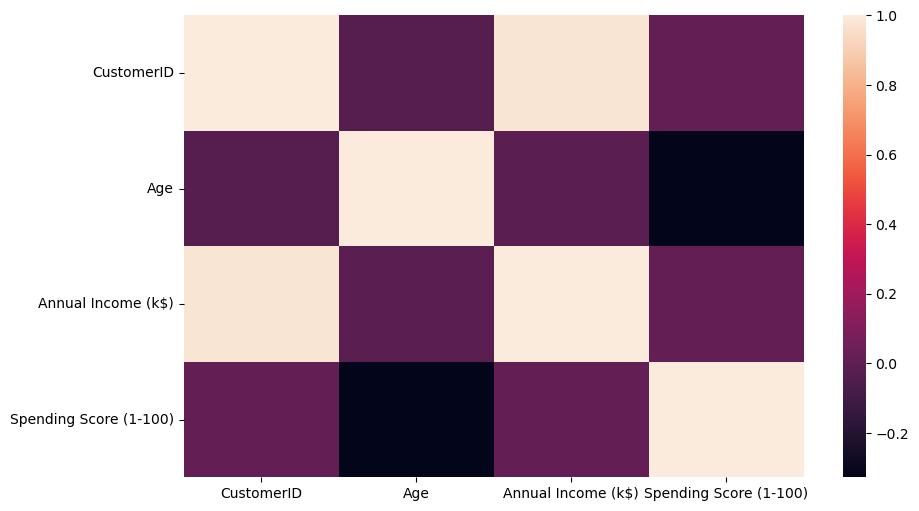

In [10]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr)
heatmap

### CustomerID is not correlated with other variables, as expected.
### Weak or negligible correlation is observed between Annual Income  and Spending Score (1-100), indicating that income does not strongly influence spending habits in this dataset.
### Similarly, Age shows no strong relationship with either Annual Income  or Spending Score (1-100). This suggests that further analysis may need to explore additional features or nonlinear relationships to understand spending patterns."

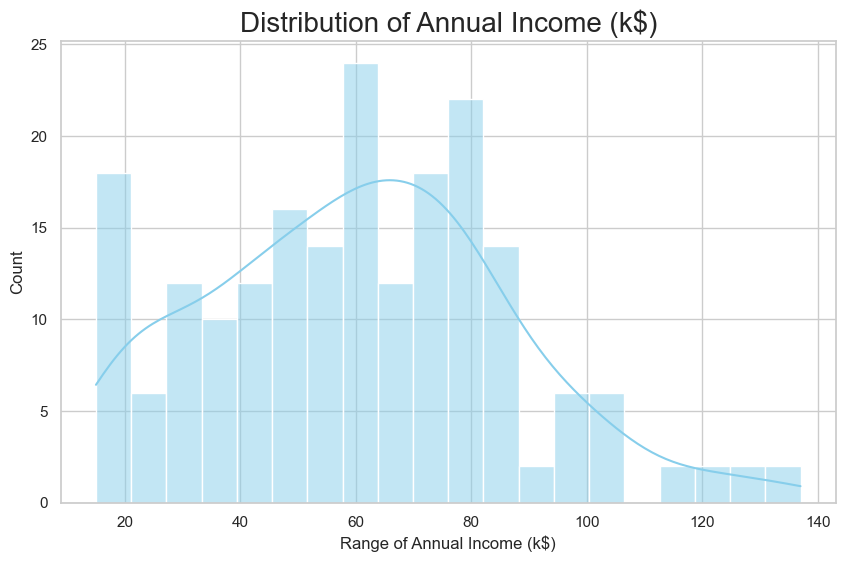

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Updated to use histplot
sns.histplot(data['Annual Income (k$)'], kde=True, color='skyblue', bins=20)

plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# The histogram illustrates the distribution of annual income among customers. The data is concentrated between 60k and 80k, indicating this is the most common income range. The KDE curve smooths out the distribution, showing a relatively uniform distribution in the mid-range while tapering off towards the extremes. This insight helps us understand the customer segmentation based on income levels, which can guide targeted marketing or business strategies.

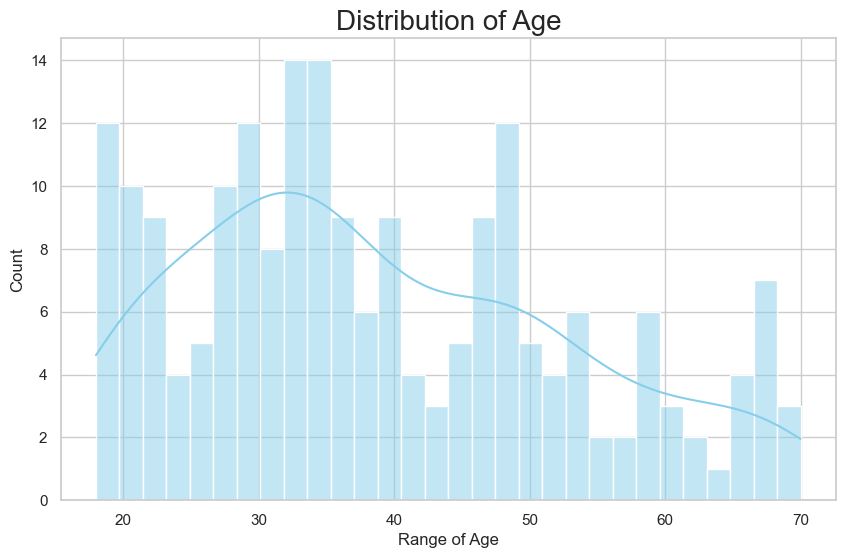

In [12]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Updated to use histplot
sns.histplot(data['Age'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# The age distribution reveals two significant customer groups, with a major concentration around 30 years and a secondary peak near 50 years. This bimodal pattern suggests two distinct age demographics. Younger customers (20–40 years) dominate the dataset, while there is a noticeable presence of middle-aged individuals (45–60 years). These insights can help tailor marketing strategies to the preferences of these age groups, such as offering different product recommendations or services.

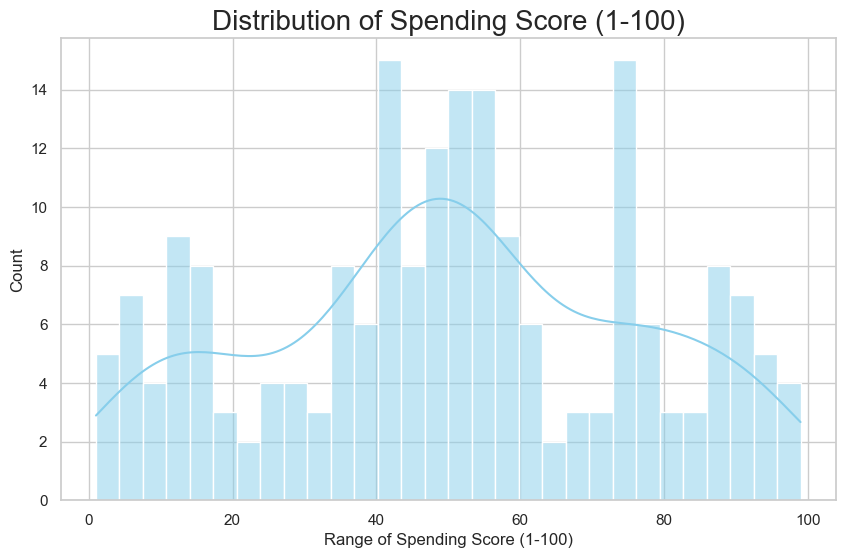

In [13]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Updated to use histplot
sns.histplot(data['Spending Score (1-100)'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Range of Spending Score (1-100)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# this histogram further illustrates the distribution of spending scores, giving us insight into customer spending behavior. The KDE line highlights the density of scores, showing a concentration around 40–60. This suggests that a significant portion of customers tend to have a moderate spending score, with fewer customers scoring at the extremes. This information could be useful for segmenting customers based on spending patterns and targeting different groups accordingly

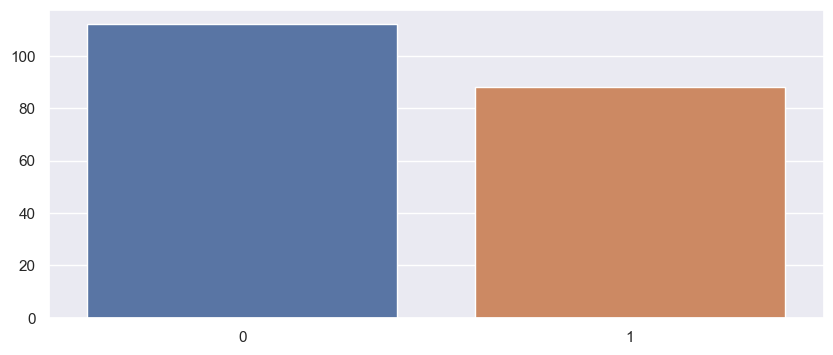

In [14]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [15]:
X=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [18]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


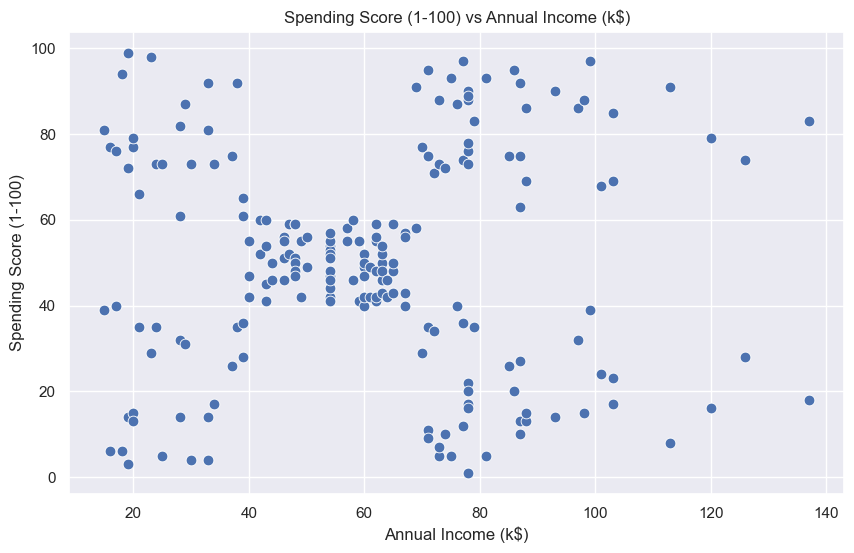

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data =X ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# This scatter plot reveals distinct customer segments based on income and spending scores, which can inform targeted marketing strategies. For instance, customers with high income but low spending scores might represent an opportunity to increase spending through premium offerings or exclusive promotions. Meanwhile, high-spending, low-income customers could be valuable to retain through loyalty programs or discounts. Identifying these clusters will allow for more personalized engagement and a better alignment of offerings with customer preferences

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y = kmeans.labels_

In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
data["label"] = y

In [24]:
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


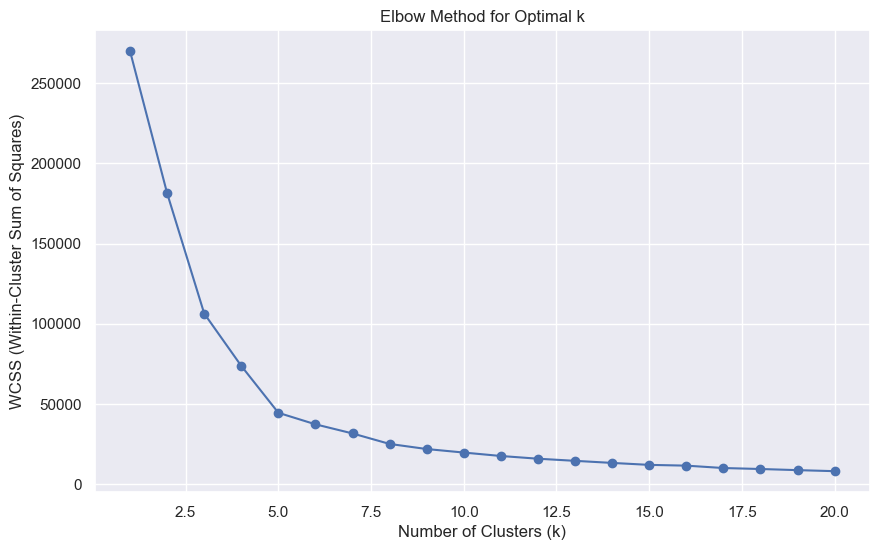

In [25]:
# Assuming X is your data
wcss = []

# Loop over a range of possible cluster numbers (1 to 20)
for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

# Plotting the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

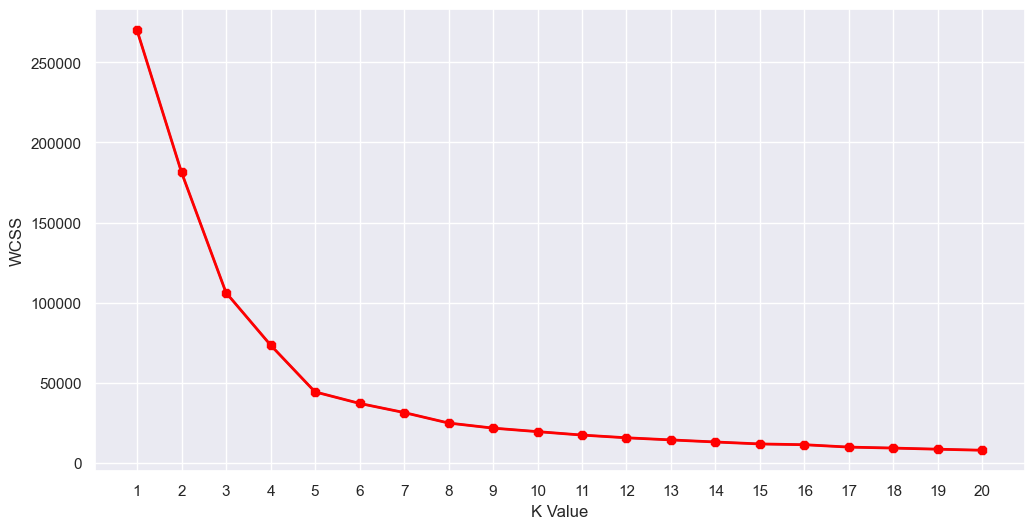

In [26]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss)
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

# K-Means with Model Training with 5 Clusters¶

In [27]:
kmeans_wcss=KMeans(n_clusters=5)
kmeans_wcss.fit(X)
y=kmeans_wcss.predict(X)
data["label"] = y
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


# Scatter Plot with 5 Clusters (ref. to Elbow Curve value)¶

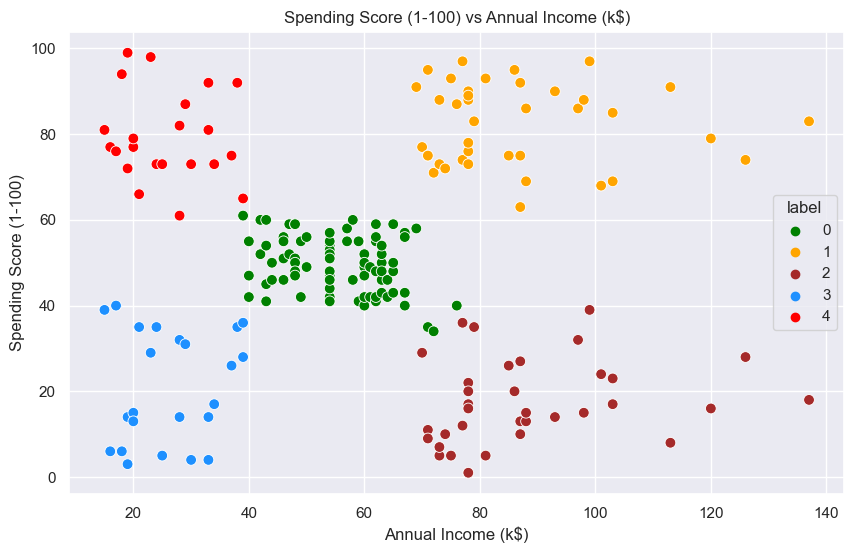

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='label',
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'], legend='full',
                data=data, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## High-Value Segment: Cluster 1 (orange) consists of high-income, high-spending customers. These could be targeted with exclusive, premium services to enhance loyalty.
## Growth Potential: Cluster 2 (brown) could be encouraged to increase their spending through targeted marketing strategies, loyalty rewards, or personalized offers.
## Retention Focus: Cluster 3 (dodgerblue) represents low-income, low-spending customers who may not currently contribute much to revenue but could be nurtured for long-term engagement.
## Budget-Friendly Offers: Cluster 4 (red) consists of customers with high spending but low income. They might respond well to discounts or budget-friendly options.

# Using K-Means++ for Elbow Curve & finding out the difference¶

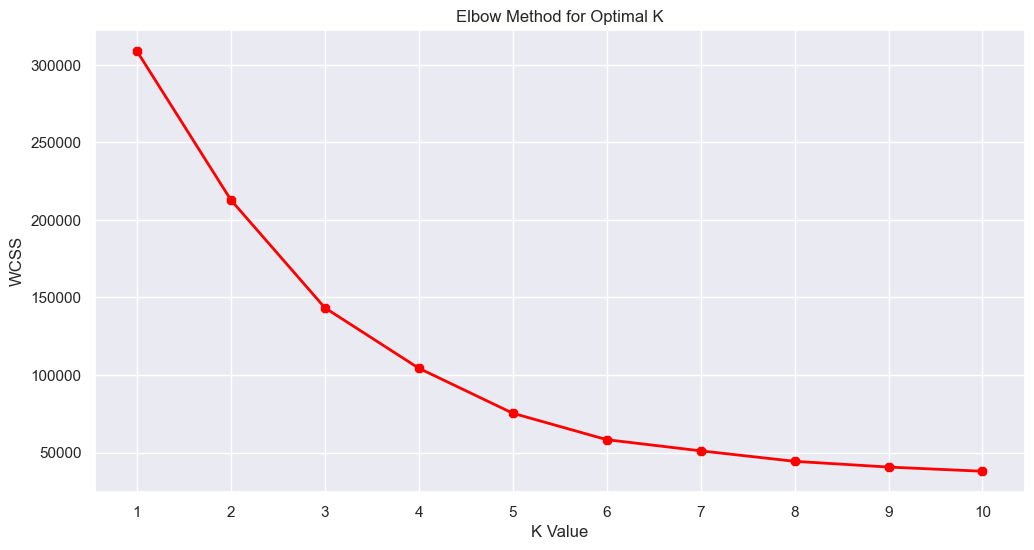

In [29]:
# Define the features for clustering
X1 = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)  # Use X1 instead of X
    wcss.append(kmeans.inertia_)

# Plot the WCSS for different k values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [30]:
kmeans2 = KMeans(n_clusters=5)
y2 = kmeans2.fit_predict(X1)
data["label"] = y2
#The data with labels
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,0
2,3,0,20,16,6,2
3,4,0,23,16,77,0
4,5,0,31,17,40,2


# 3D Plot for the selected 3 features¶

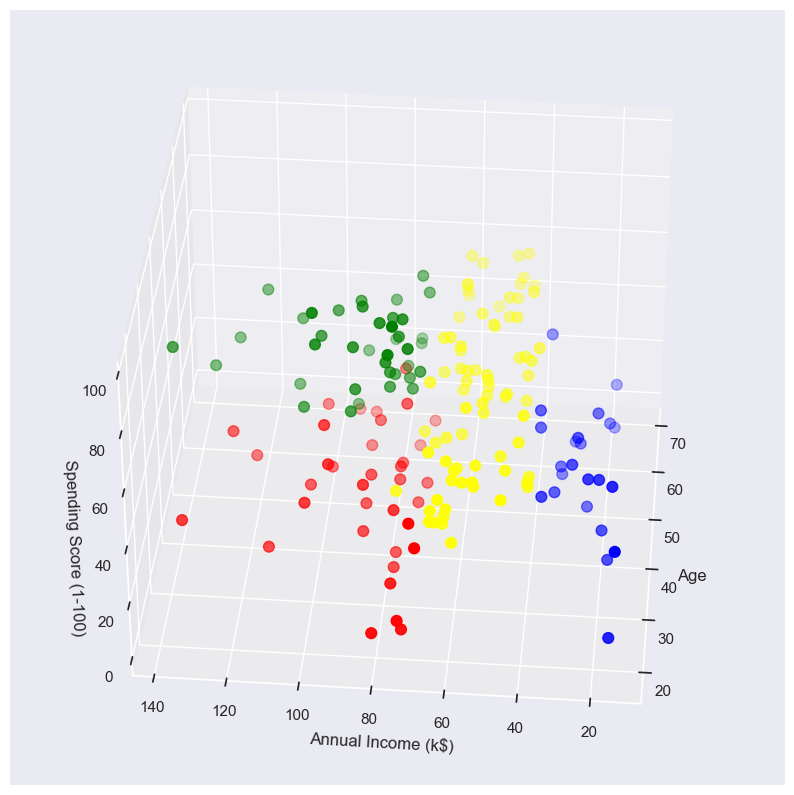

In [31]:
# Create a 3D scatter plot for each label
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each label
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='blue', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='green', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='yellow', s=60)

# View angle and labels
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

# Show plot
plt.show()

# Number of customers from each cluster¶

In [32]:
cust1=data[data["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=data[data["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=data[data["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=data[data["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=data[data["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 2nd group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 3rd group= 25
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 66
 69]
--------------------------------------------
Number of customer in 4th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 5th group= 77
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  74  75  76  77  78  79  80